# Загрузка Pandas и очистка данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
df = pd.read_csv('main_task.csv')

In [3]:
# Ваш код по очистке данных и генерации новых признаков
df['Price Range'] = df['Price Range'].str.replace('$','1')
df['Price Range'] = df['Price Range'].str.replace('11 - 111','2')
df['Price Range'] = df['Price Range'].str.replace('1111','3')
df['Price Range'] = df['Price Range'].fillna(value=2)
df['Price Range'] = df['Price Range'].astype(int)

def clean_name(str_val):
    if pd.isna(str_val) : return ["European"] #города все европейские, так что пропуски заполним европейской кухней
    str_val = str_val.strip('[]') # Отбрасываем скобки.
    str_val = str_val.replace("]",'')
    str_val = str_val.replace("[",'')
    str_val = str_val.replace("\'",'') # Убираем надоедливые кавычки '.
    str_val = str_val.split(", ") # Разбиваем строку по названиям кухонь.
    return str_val
df['Cuisine Style'] = df['Cuisine Style'].apply(clean_name)
df['Reviews']= df["Reviews"].apply(clean_name)

df['Cuisine Count']=df['Cuisine Style'].apply(lambda x: len(x)) #количество разных кухонь

df['ID_TA'] = df['ID_TA'].str.replace('d','')
df['ID_TA'] = df['ID_TA'].astype(int)

df['Restaurant_id'] = df['Restaurant_id'].str.replace('id_','')
df['Restaurant_id'] = df['Restaurant_id'].astype(int)

df['Number of Reviews']=df['Number of Reviews'].fillna(df['Number of Reviews'].mean())
# При необходимости добавьте ячейки



In [4]:
df2 = df.explode('Cuisine Style').dropna()
df2['Cuisine Style'].value_counts()

European               19343
Vegetarian Friendly    11189
Mediterranean           6277
Italian                 5964
Vegan Options           4486
                       ...  
Burmese                    1
Yunnan                     1
Latvian                    1
Salvadoran                 1
Xinjiang                   1
Name: Cuisine Style, Length: 125, dtype: int64

In [5]:
len(df['City'].unique())

31

In [6]:
round(df['Cuisine Style'].apply(lambda x: len(x)).mean(),1)

2.6

In [7]:
def capital(City):
    if City=='Paris' or City=='Stockholm'or City=='London'or City=='Berlin'or City=='Bratislava' or City=='Vienna'or City=='Rome'or City=='Madrid'or City=='Dublin'or City=='Brussels'or City=='Warsaw' or City=='Budapest'or City=='Copenhagen' or City=='Amsterdam' or City=='Lisbon' or City=='Prague' or City=='Oslo' or City=='Helsinki' or City=='Ljubljana' or City=='Athens' or City=='Luxembourg':
        return "1"
    else:
        return "0" 

df['capital'] = df.City.apply(capital)

In [8]:
dummies = pd.get_dummies(df2['Cuisine Style'])
df=pd.concat([df.drop(columns='Cuisine Style'), dummies], axis=1)

In [9]:
dummies = pd.get_dummies(df['City'])
df=pd.concat([df.drop(columns='City'), dummies], axis=1)

In [10]:
df.head()


,Restaurant_id,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,Cuisine Count,capital,...,Munich,Oporto,Oslo,Paris,Prague,Rome,Stockholm,Vienna,Warsaw,Zurich
0,5569,5570.0,3.5,2,194.0,"[Good food at your doorstep, A good hotel rest...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,1912643,3,1,...,0,0,0,1,0,0,0,0,0,0
0,5569,5570.0,3.5,2,194.0,"[Good food at your doorstep, A good hotel rest...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,1912643,3,1,...,0,0,0,1,0,0,0,0,0,0
0,5569,5570.0,3.5,2,194.0,"[Good food at your doorstep, A good hotel rest...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,1912643,3,1,...,0,0,0,1,0,0,0,0,0,0
1,1535,1537.0,4.0,2,10.0,"[Unique cuisine, Delicious Nepalese food, 07/0...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,7992032,1,1,...,0,0,0,0,0,0,1,0,0,0
2,352,353.0,4.5,3,688.0,"[Catch up with friends, Not exceptional, 01/08...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,8632781,7,1,...,0,0,0,0,0,0,0,0,0,0


In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 104896 entries, 0 to 39999
Columns: 166 entries, Restaurant_id to Zurich
dtypes: float64(3), int32(3), int64(1), object(3), uint8(156)
memory usage: 23.2+ MB


In [12]:
df['Price Range'].value_counts()

2    81303
1    18115
3     5478
Name: Price Range, dtype: int64

In [13]:
df1 = df.explode('Reviews').dropna()

In [14]:
df=df.drop(['Reviews','URL_TA', 'ID_TA'], axis = 1)
df

,Restaurant_id,Ranking,Rating,Price Range,Number of Reviews,Cuisine Count,capital,Afghani,African,Albanian,...,Munich,Oporto,Oslo,Paris,Prague,Rome,Stockholm,Vienna,Warsaw,Zurich
0,5569,5570.0,3.5,2,194.0,3,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
0,5569,5570.0,3.5,2,194.0,3,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
0,5569,5570.0,3.5,2,194.0,3,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1535,1537.0,4.0,2,10.0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,352,353.0,4.5,3,688.0,7,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39998,640,641.0,4.0,2,70.0,5,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
39998,640,641.0,4.0,2,70.0,5,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
39998,640,641.0,4.0,2,70.0,5,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
39998,640,641.0,4.0,2,70.0,5,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели

In [15]:
# Х - данные с информацией о ресторанах, у - целевая переменная (рейтинги ресторанов)
X = df.drop(['Restaurant_id', 'Rating'], axis = 1)
y = df['Rating']

In [16]:
# Загружаем специальный инструмент для разбивки:
from sklearn.model_selection import train_test_split

In [17]:
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.
# Для тестирования мы будем использовать 25% от исходного датасета.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Создаём, обучаем и тестируем модель

In [18]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [19]:
# Создаём модель
regr = RandomForestRegressor(n_estimators=100)

# Обучаем модель на тестовом наборе данных
regr.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = regr.predict(X_test)

In [20]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.09964536302623549


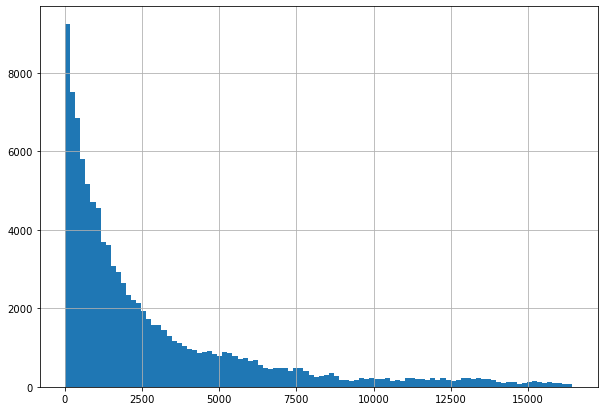

In [21]:
plt.rcParams['figure.figsize'] = (10,7)
X['Ranking'].hist(bins=100)

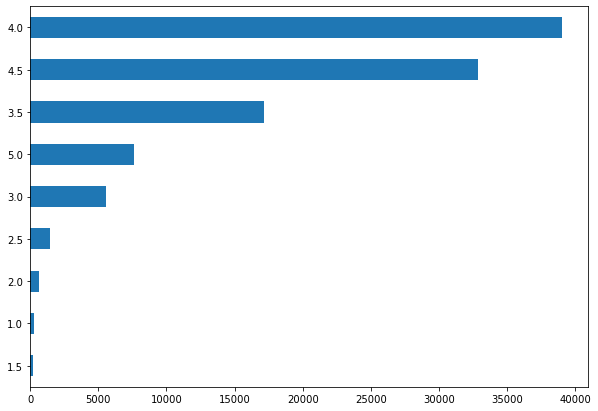

In [22]:
df['Rating'].value_counts(ascending=True).plot(kind='barh')

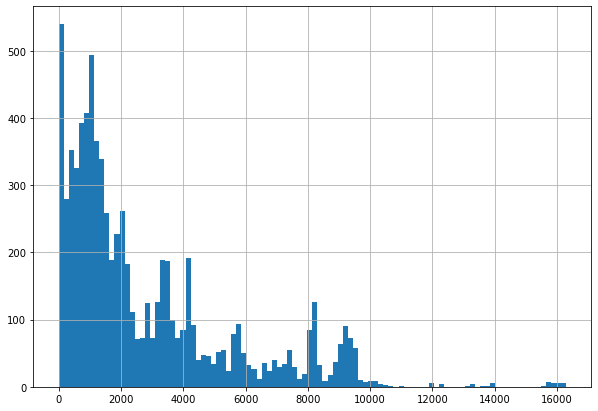

In [23]:
df['Ranking'][df['Rating'] == 5].hist(bins=100)

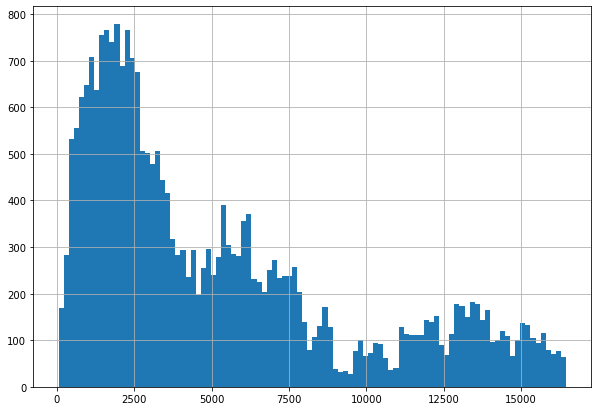

In [24]:
df['Ranking'][df['Rating'] < 4].hist(bins=100)

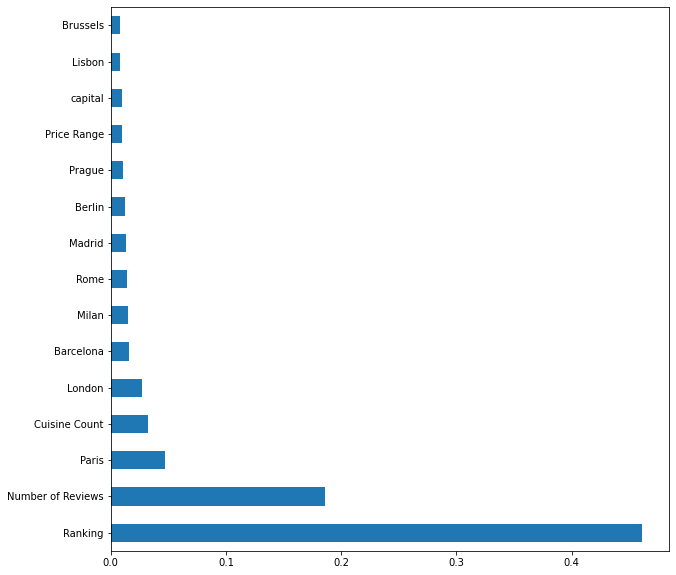

In [25]:
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(regr.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')